<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/20_Tesouro_Direto_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Python para Investimentos - Tesouro Direto

**Python para Investimentos** é um conjunto de códigos e vídeos em que mostro como utilizar a linguagem de programação PYTHON através da ferramenta online Google Colab para fazer estudos no mercado financeiro.

**Canal no Youtube:** https://www.youtube.com/ricospeloacaso?sub_confirmation=1

---


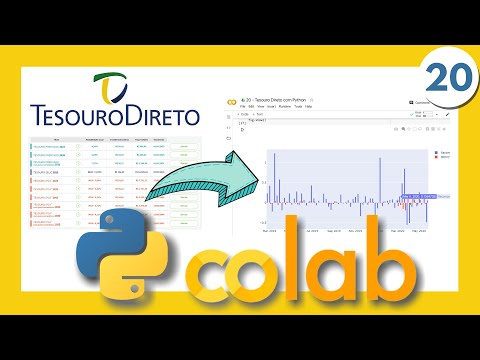

In [65]:
#@title Vídeo
from IPython.display import YouTubeVideo
YouTubeVideo('U3zuklVH6k4', width=854, height=480)

## Base de Dados: https://www.tesourotransparente.gov.br/ckan/dataset

## Importações e Configurações Iniciais

In [68]:
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib
#matplotlib.style.use('seaborn-darkgrid')
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (18,8)

import plotly.graph_objects as go
import plotly.express as px

In [69]:
#!pip install yfinance
import yfinance as yf

In [70]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 1. Funções para Busca e Tratamento de  Dados do Tesouro Direto

In [72]:
def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

In [73]:
def busca_vendas_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

In [74]:
def busca_recompras_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

## 2.Preços e Taxas Históricas dos Títulos Negociados

Essa conjunto de dados contém as taxas e preços dos títulos ofertados pelo Tesouro Direto. Refletem o mercado secundário de títulos públicos federais. 

### 2.1 Buscando dados

In [77]:
titulos = busca_titulos_tesouro_direto()

In [78]:
titulos.sort_index(inplace=True)
titulos

Taxa Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                       
Tesouro Educa+ 2030-12-15      2023-08-01               5.06   
                               2023-08-02               5.05   
                               2023-08-03               5.02   
                               2023-08-04               5.02   
                               2023-08-07               4.98   
                               2023-08-08               4.96   
                               2023-08-09               4.95   
                               2023-08-10               4.89   
                               2023-08-11               4.84   
                               2023-08-14               4.89   
...                                                      ...   
Tesouro Selic  2031-03-01      2025-05-20               0.11   
                               2025-05-21               0.11   
                               2025-05-22               0.11   
                               2025-05-23               0.11   
                               2025-05-26               0.11   
                               2025-05-27               0.11   
                               2025-05-28               0.11   
                               2025-05-29               0.11   
                               2025-05-30               0.11   
                               2025-06-02               0.11   

                                           Taxa Venda Manha  PU Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                                       
Tesouro Educa+ 2030-12-15      2023-08-01              5.18          3248.87   
                               2023-08-02              5.17          3251.07   
                               2023-08-03              5.14          3256.24   
                               2023-08-04              5.14          3257.13   
                               2023-08-07              5.10          3263.78   
                               2023-08-08              5.08          3267.47   
                               2023-08-09              5.07          3269.66   
                               2023-08-10              5.01          3279.31   
                               2023-08-11              4.96          3288.92   
                               2023-08-14              5.01          3282.20   
...                                                     ...              ...   
Tesouro Selic  2031-03-01      2025-05-20              0.12         16482.85   
                               2025-05-21              0.12         16492.44   
                               2025-05-22              0.12         16501.74   
                               2025-05-23              0.12         16510.96   
                               2025-05-26              0.12         16520.55   
                               2025-05-27              0.12         16530.07   
                               2025-05-28              0.12         16539.31   
                               2025-05-29              0.12         16548.45   
                               2025-05-30              0.12         16557.49   
                               2025-06-02              0.12         16566.56   

                                           PU Venda Manha  PU Base Manha  
Tipo Titulo    Data Vencimento Data Base                                  
Tesouro Educa+ 2030-12-15      2023-08-01         3230.41        3230.41  
                               2023-08-02         3232.62        3232.62  
                               2023-08-03         3237.76        3237.76  
                               2023-08-04         3238.49        3238.49  
                               2023-08-07         3245.29        3245.29  
                               2023-08-08         3248.97        3248.97  
                               2023-08-09         3251.16        3251.16  
                               2023-08-10         3260

In [79]:
tipos_titulos = titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()
tipos_titulos

['Tesouro Educa+',
 'Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Renda+ Aposentadoria Extra',
 'Tesouro Selic']

### 2.2 Tesouro Selic (PU: preço unitário)

In [81]:
selic2031 = titulos.loc[('Tesouro Selic', '2031-03-01')]
selic2031

Taxa Compra Manha  Taxa Venda Manha  PU Compra Manha  \
Data Base                                                          
2025-02-03               0.11              0.12         15886.70   
2025-02-04               0.11              0.12         15894.28   
2025-02-05               0.12              0.13         15900.98   
2025-02-06               0.12              0.13         15906.38   
2025-02-07               0.12              0.13         15909.67   
2025-02-10               0.12              0.13         15916.69   
2025-02-11               0.13              0.14         15923.15   
2025-02-12               0.12              0.13         15932.75   
2025-02-13               0.12              0.13         15941.88   
2025-02-14               0.12              0.13         15950.73   
...                       ...               ...              ...   
2025-05-20               0.11              0.12         16482.85   
2025-05-21               0.11              0.12         16492.44   
2025-05-22               0.11              0.12         16501.74   
2025-05-23               0.11              0.12         16510.96   
2025-05-26               0.11              0.12         16520.55   
2025-05-27               0.11              0.12         16530.07   
2025-05-28               0.11              0.12         16539.31   
2025-05-29               0.11              0.12         16548.45   
2025-05-30               0.11              0.12         16557.49   
2025-06-02               0.11              0.12         16566.56   

            PU Venda Manha  PU Base Manha  
Data Base                                  
2025-02-03        15869.23       15869.23  
2025-02-04        15876.80       15876.80  
2025-02-05        15883.52       15883.52  
2025-02-06        15888.90       15888.90  
2025-02-07        15892.19       15892.19  
2025-02-10        15899.22       15899.22  
2025-02-11        15905.67       15905.67  
2025-02-12        15915.26       15915.26  
2025-02-13        15924.40       15924.40  
2025-02-14        15933.24       15933.24  
...                    ...            ...  
2025-05-20        16464.34       16464.34  
2025-05-21        16473.92       16473.92  
2025-05-22        16483.21       16483.21  
2025-05-23        16492.43       16492.43  
2025-05-26        16502.03       16502.03  
2025-05-27        16511.54       16511.54  
2025-05-28        16520.76       16520.76  
2025-05-29        16529.89       16529.89  
2025-05-30        16538.95       16538.95  
2025-06-02        16548.01       16548.01  

[81 rows x 5 columns]

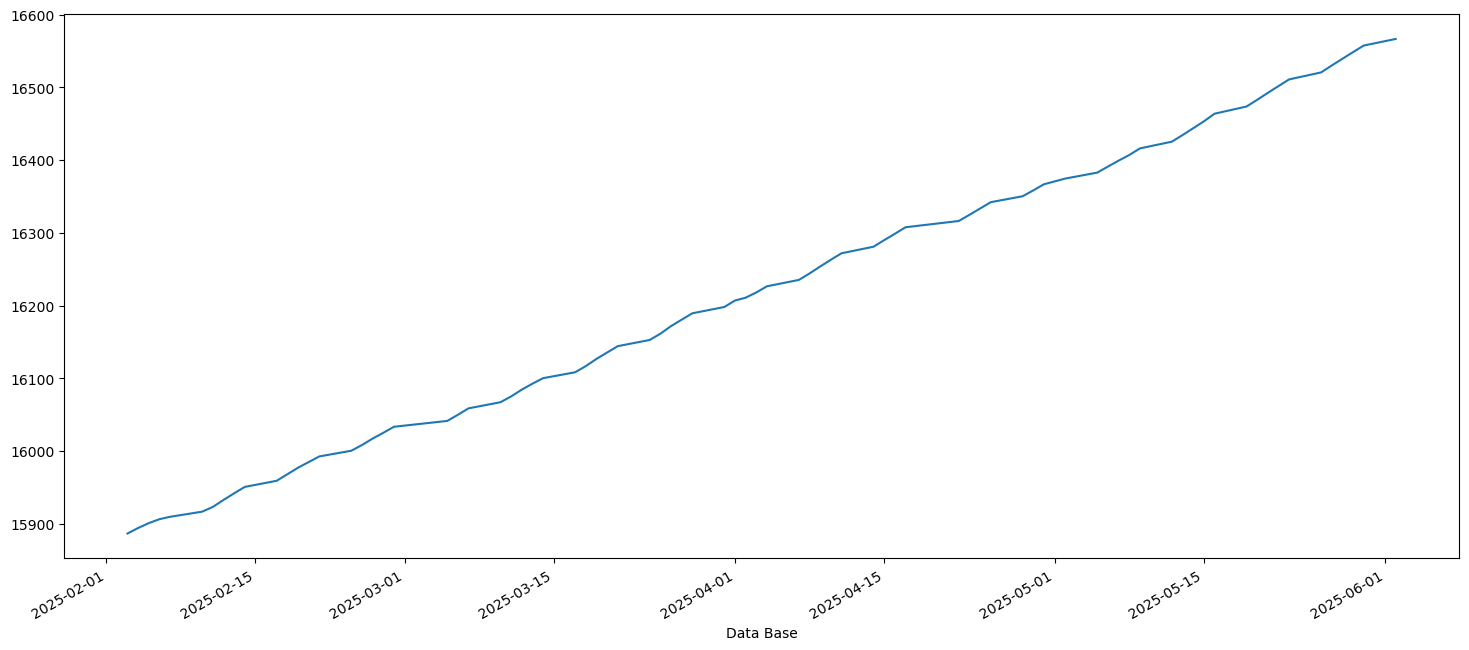

In [82]:
selic2031['PU Compra Manha'].plot();

In [83]:
selic2031.columns

Index(['Taxa Compra Manha', 'Taxa Venda Manha', 'PU Compra Manha',
       'PU Venda Manha', 'PU Base Manha'],
      dtype='object')

### 2.3 Pré-fixado 2028

In [85]:
pre2028 = titulos.loc[('Tesouro Prefixado', '2028-01-01')]
pre2028

Taxa Compra Manha  Taxa Venda Manha  PU Compra Manha  \
Data Base                                                          
2025-02-03              14.83             14.95           670.29   
2025-02-04              14.63             14.75           674.05   
2025-02-05              14.69             14.81           673.40   
2025-02-06              14.87             14.99           670.72   
2025-02-07              14.82             14.94           671.93   
2025-02-10              15.06             15.18           668.28   
2025-02-11              14.95             15.07           670.49   
2025-02-12              14.85             14.97           672.54   
2025-02-13              14.89             15.01           672.24   
2025-02-14              14.79             14.91           674.28   
...                       ...               ...              ...   
2025-05-20              13.40             13.52           720.11   
2025-05-21              13.53             13.65           718.32   
2025-05-22              13.66             13.78           716.54   
2025-05-23              13.57             13.69           718.38   
2025-05-26              13.56             13.68           718.91   
2025-05-27              13.36             13.48           722.56   
2025-05-28              13.37             13.49           722.76   
2025-05-29              13.50             13.62           720.98   
2025-05-30              13.50             13.62           721.34   
2025-06-02              13.57             13.69           720.56   

            PU Venda Manha  PU Base Manha  
Data Base                                  
2025-02-03          667.90         667.90  
2025-02-04          671.65         671.65  
2025-02-05          671.00         671.00  
2025-02-06          668.34         668.34  
2025-02-07          669.55         669.55  
2025-02-10          665.91         665.91  
2025-02-11          668.12         668.12  
2025-02-12          670.16         670.16  
2025-02-13          669.86         669.86  
2025-02-14          671.90         671.90  
...                    ...            ...  
2025-05-20          717.76         717.76  
2025-05-21          715.98         715.98  
2025-05-22          714.21         714.21  
2025-05-23          716.05         716.05  
2025-05-26          716.58         716.58  
2025-05-27          720.23         720.23  
2025-05-28          720.42         720.42  
2025-05-29          718.65         718.65  
2025-05-30          719.02         719.02  
2025-06-02          718.24         718.24  

[81 rows x 5 columns]

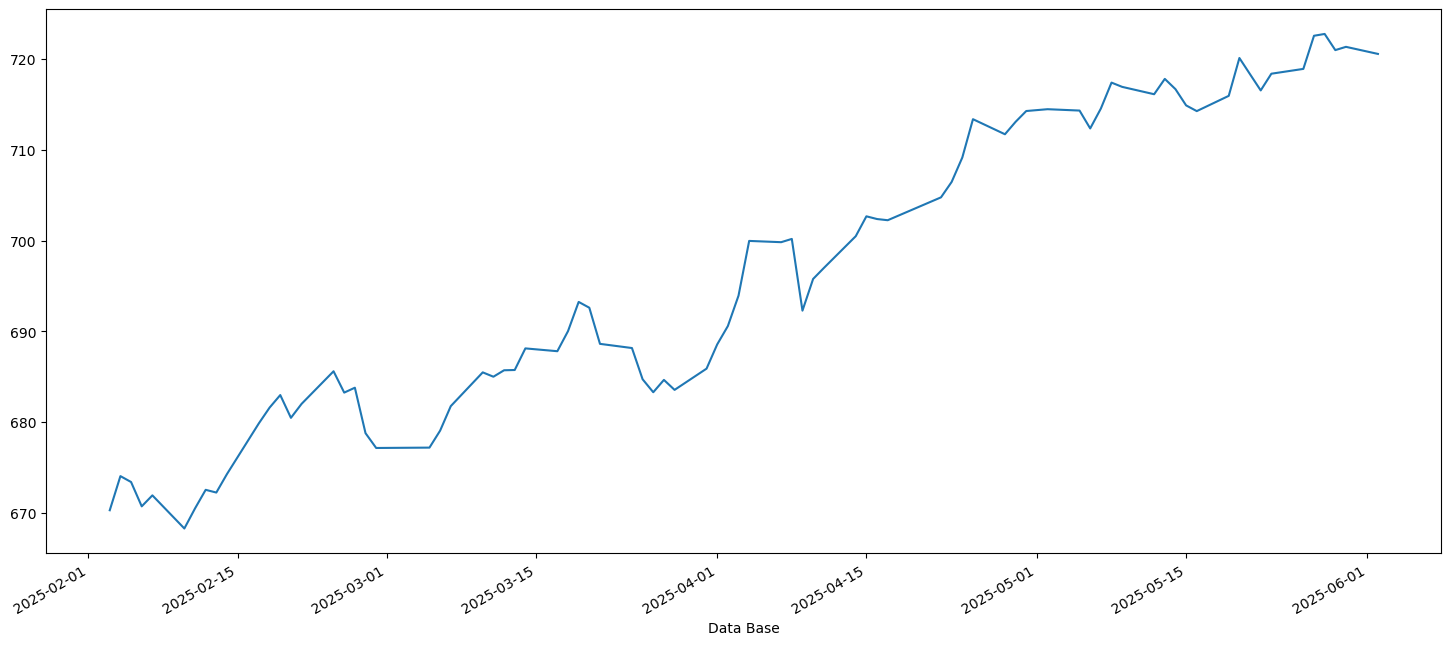

In [86]:
pre2028['PU Compra Manha'].plot();

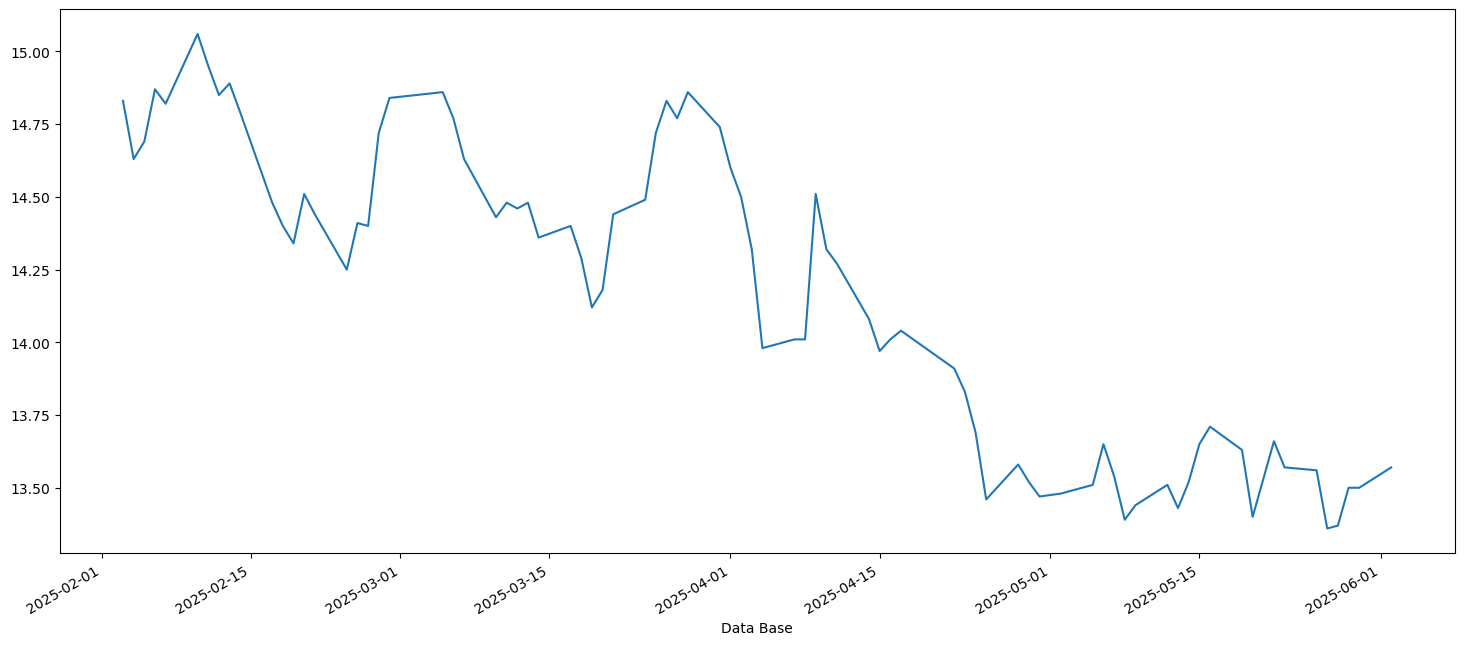

In [87]:
pre2028['Taxa Compra Manha'].plot();

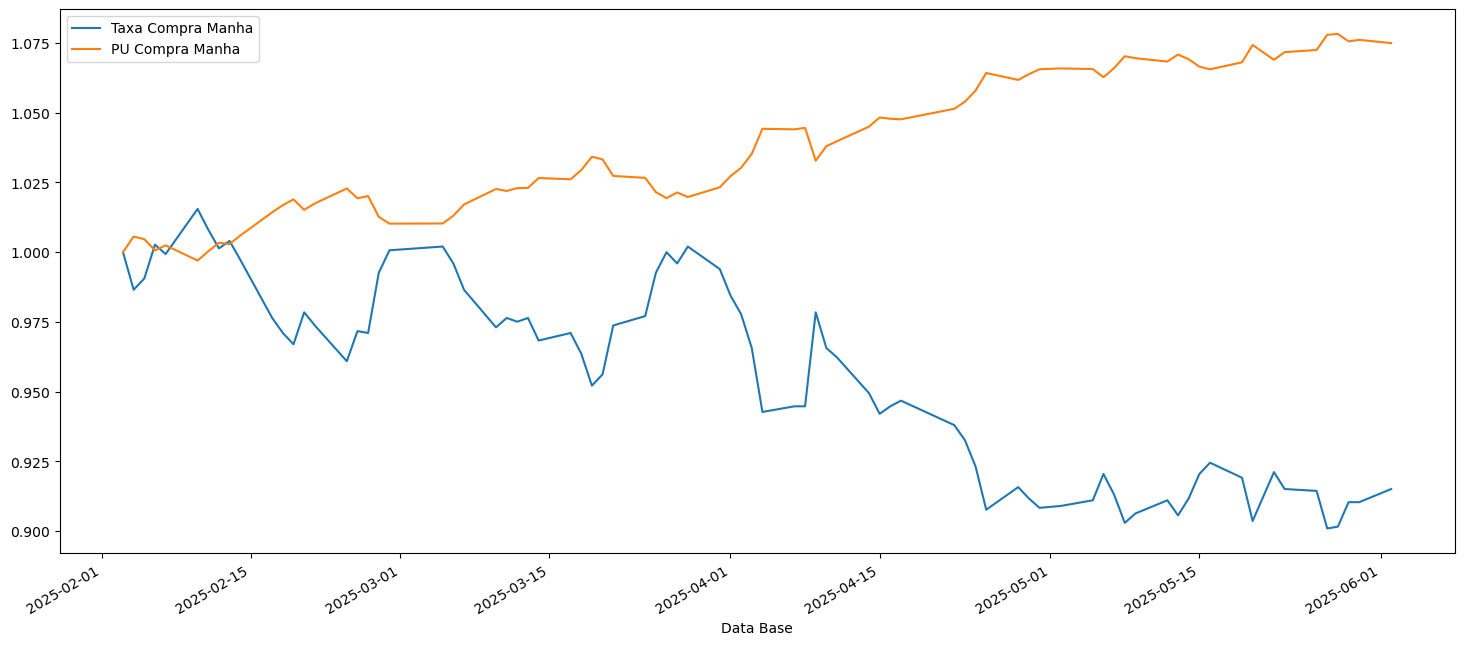

In [88]:
ax = (pre2028['Taxa Compra Manha'] / pre2028['Taxa Compra Manha'].iloc[0]).plot(label='Taxa Compra Manha')
(pre2028['PU Compra Manha'] / pre2028['PU Compra Manha'].iloc[0]).plot(ax=ax, label='PU Compra Manha')

# Adicionando legenda
plt.legend()
plt.show()

### 2.4 Pré-fixado 2026

In [90]:
pre2026 = titulos.loc[('Tesouro Prefixado', '2026-01-01')]
pre2026

Taxa Compra Manha  Taxa Venda Manha  PU Compra Manha  \
Data Base                                                          
2020-02-10               6.36              6.48           696.02   
2020-02-11               6.26              6.38           700.05   
2020-02-12               6.22              6.34           701.76   
2020-02-13               6.28              6.40           699.61   
2020-02-14               6.23              6.35           701.71   
2020-02-17               6.19              6.31           703.43   
2020-02-18               6.21              6.33           702.82   
2020-02-19               6.24              6.36           701.83   
2020-02-20               6.21              6.33           703.16   
2020-02-21               6.28              6.40           700.63   
...                       ...               ...              ...   
2025-05-20              14.63             14.75           917.95   
2025-05-21              14.67             14.79           918.25   
2025-05-22              14.69             14.81           918.65   
2025-05-23              14.65             14.77           919.34   
2025-05-26              14.64             14.76           919.89   
2025-05-27              14.60             14.72           920.59   
2025-05-28              14.63             14.75           920.94   
2025-05-29              14.67             14.79           921.24   
2025-05-30              14.65             14.77           921.84   
2025-06-02              14.68             14.80           922.20   

            PU Venda Manha  PU Base Manha  
Data Base                                  
2020-02-10          691.42         691.25  
2020-02-11          695.42         695.25  
2020-02-12          697.13         696.96  
2020-02-13          695.00         694.82  
2020-02-14          697.08         696.91  
2020-02-17          698.79         698.62  
2020-02-18          698.19         698.02  
2020-02-19          697.21         697.04  
2020-02-20          698.53         698.36  
2020-02-21          696.02         695.85  
...                    ...            ...  
2025-05-20          916.85         916.85  
2025-05-21          917.15         917.15  
2025-05-22          917.55         917.55  
2025-05-23          918.25         918.25  
2025-05-26          918.80         918.80  
2025-05-27          919.50         919.50  
2025-05-28          919.85         919.85  
2025-05-29          920.16         920.16  
2025-05-30          920.76         920.76  
2025-06-02          921.12         921.12  

[1321 rows x 5 columns]

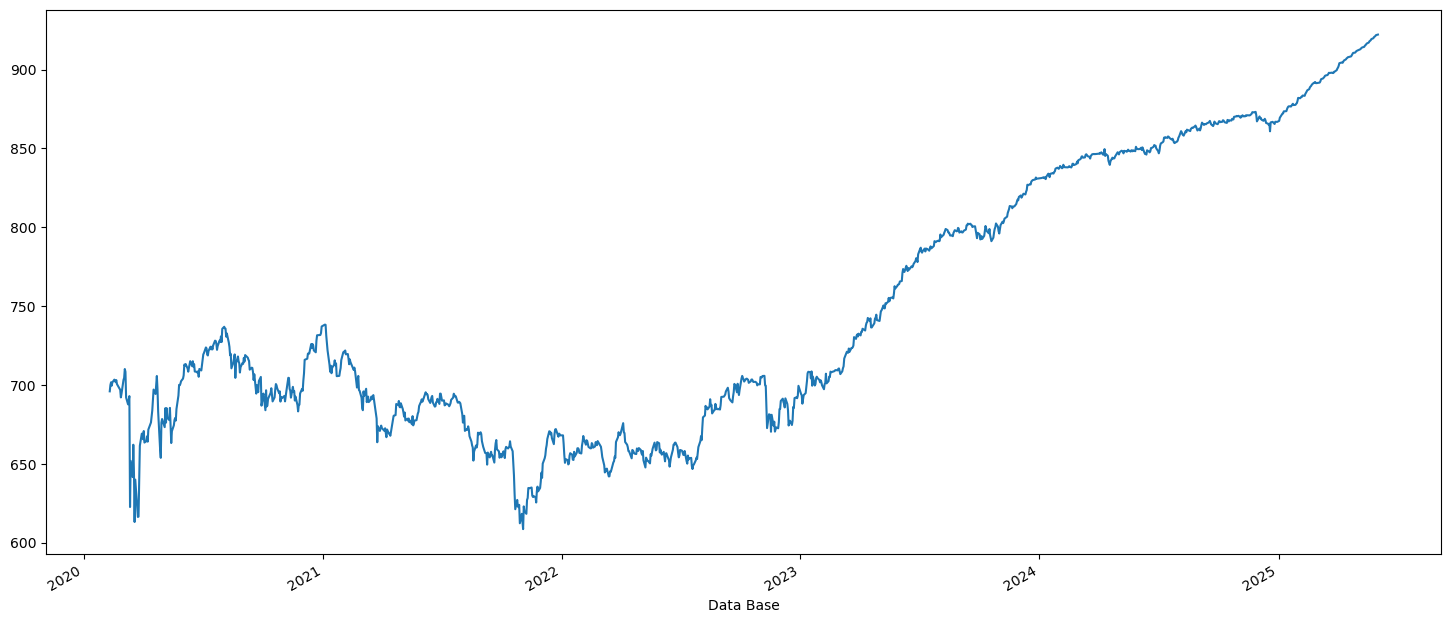

In [91]:
pre2026['PU Compra Manha'].plot();

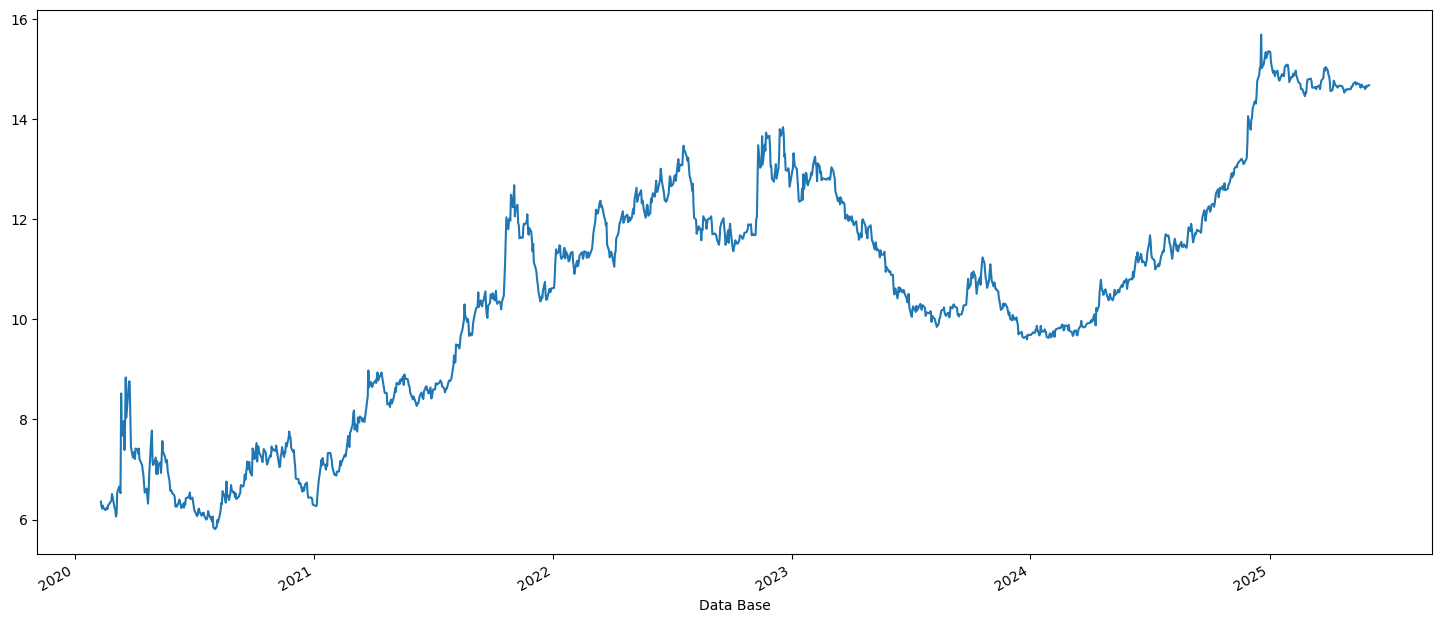

In [92]:
pre2026['Taxa Compra Manha'].plot();

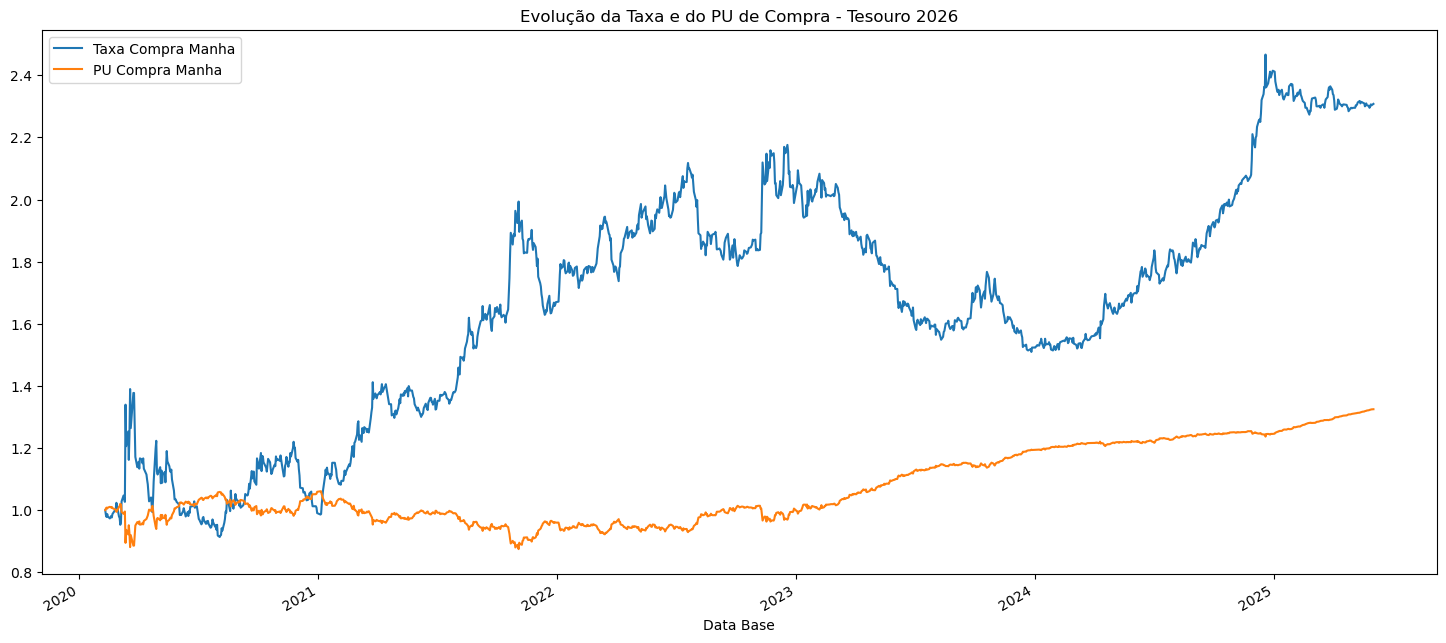

In [93]:
ax = (pre2026['Taxa Compra Manha'] / pre2026['Taxa Compra Manha'].iloc[0]).plot(label='Taxa Compra Manha')
(pre2026['PU Compra Manha'] / pre2026['PU Compra Manha'].iloc[0]).plot(ax=ax, label='PU Compra Manha')

# Adicionando legenda e título
plt.legend()
plt.title('Evolução da Taxa e do PU de Compra - Tesouro 2026')
plt.show()


### 2.5 Pré-fixado 2031 com Juros Semestrais

In [95]:
pre2031 = titulos.loc[('Tesouro Prefixado com Juros Semestrais', '2031-01-01')]
pre2031

Taxa Compra Manha  Taxa Venda Manha  PU Compra Manha  \
Data Base                                                          
2020-02-10               6.69              6.81          1257.57   
2020-02-11               6.57              6.69          1268.26   
2020-02-12               6.56              6.68          1269.45   
2020-02-13               6.64              6.76          1262.85   
2020-02-14               6.56              6.68          1270.09   
2020-02-17               6.54              6.66          1272.15   
2020-02-18               6.59              6.71          1268.13   
2020-02-19               6.63              6.75          1265.00   
2020-02-20               6.62              6.74          1266.18   
2020-02-21               6.74              6.86          1256.21   
...                       ...               ...              ...   
2025-05-20              13.87             13.99           898.78   
2025-05-21              14.03             14.15           894.03   
2025-05-22              14.16             14.28           890.29   
2025-05-23              14.05             14.17           894.31   
2025-05-26              14.08             14.20           893.81   
2025-05-27              13.86             13.98           901.43   
2025-05-28              13.81             13.93           903.53   
2025-05-29              13.92             14.04           900.40   
2025-05-30              13.90             14.02           901.52   
2025-06-02              13.91             14.03           901.66   

            PU Venda Manha  PU Base Manha  
Data Base                                  
2020-02-10         1247.33        1247.00  
2020-02-11         1257.90        1257.57  
2020-02-12         1259.08        1258.76  
2020-02-13         1252.56        1252.23  
2020-02-14         1259.73        1259.40  
2020-02-17         1261.77        1261.45  
2020-02-18         1257.80        1257.48  
2020-02-19         1254.71        1254.39  
2020-02-20         1255.89        1255.56  
2020-02-21         1246.04        1245.71  
...                    ...            ...  
2025-05-20          894.40         894.40  
2025-05-21          889.68         889.68  
2025-05-22          885.97         885.97  
2025-05-23          889.97         889.97  
2025-05-26          889.47         889.47  
2025-05-27          897.05         897.05  
2025-05-28          899.14         899.14  
2025-05-29          896.04         896.04  
2025-05-30          897.15         897.15  
2025-06-02          897.30         897.30  

[1321 rows x 5 columns]

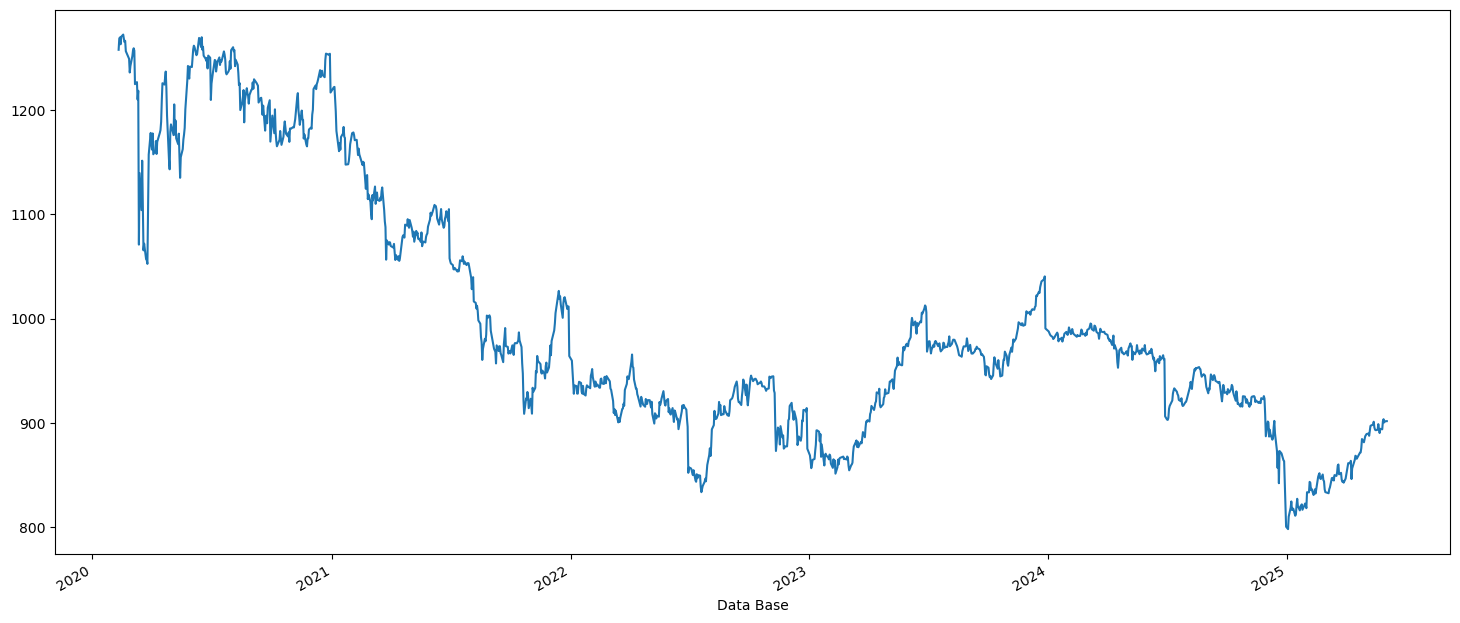

In [96]:
pre2031['PU Compra Manha'].plot();

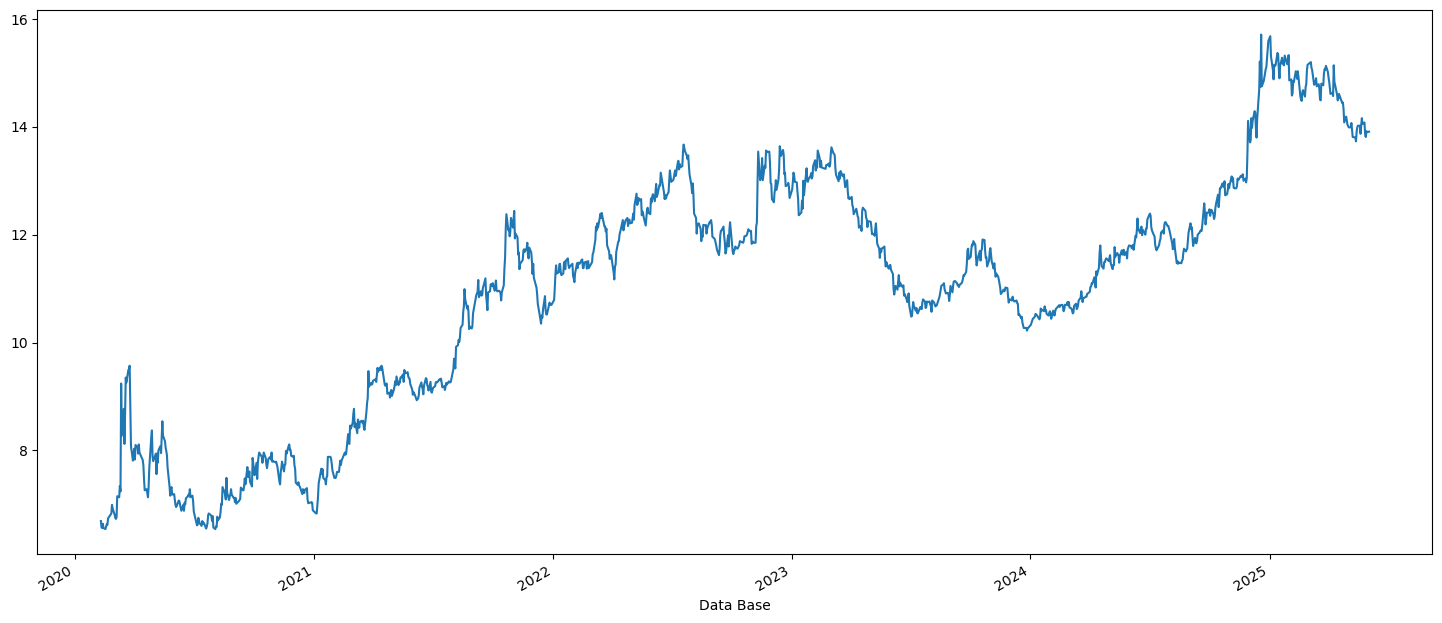

In [97]:
pre2031['Taxa Compra Manha'].plot();

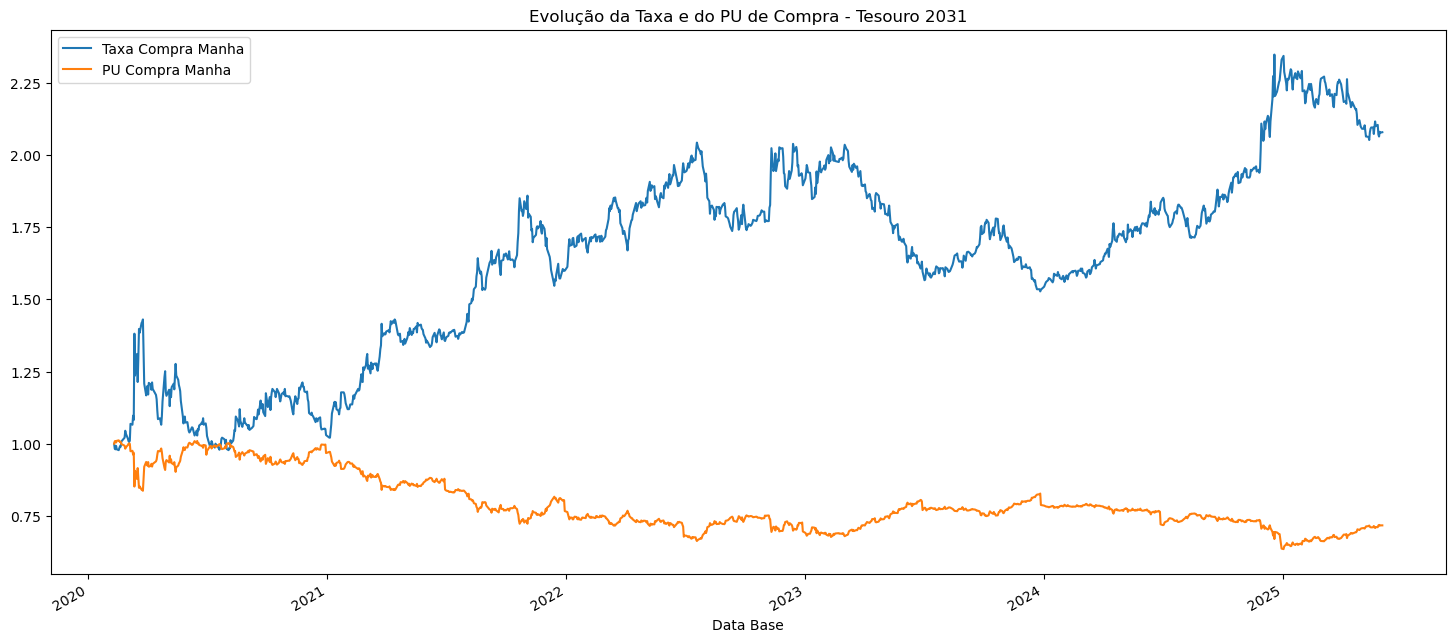

In [98]:
ax = (pre2031['Taxa Compra Manha'] / pre2031['Taxa Compra Manha'].iloc[0]).plot(label='Taxa Compra Manha')
(pre2031['PU Compra Manha'] / pre2031['PU Compra Manha'].iloc[0]).plot(ax=ax, label='PU Compra Manha')

# Adicionando legenda e título
plt.legend()
plt.title('Evolução da Taxa e do PU de Compra - Tesouro 2031')
plt.show()


### 2.6 Tesouro IPCA+ 2026

In [100]:
ipca2026 = titulos.loc[('Tesouro IPCA+', '2026-08-15')]
ipca2026

Taxa Compra Manha  Taxa Venda Manha  PU Compra Manha  \
Data Base                                                          
2020-02-10               2.65              2.77          2785.55   
2020-02-11               2.58              2.70          2798.39   
2020-02-12               2.56              2.68          2802.40   
2020-02-13               2.58              2.70          2799.33   
2020-02-14               2.54              2.66          2807.15   
2020-02-17               2.49              2.61          2816.44   
2020-02-18               2.53              2.65          2809.76   
2020-02-19               2.56              2.68          2804.86   
2020-02-20               2.50              2.62          2815.90   
2020-02-21               2.55              2.67          2808.11   
...                       ...               ...              ...   
2025-05-20               9.04              9.16          4050.24   
2025-05-21               9.15              9.27          4047.05   
2025-05-22               9.22              9.34          4045.74   
2025-05-23               9.21              9.33          4049.06   
2025-05-26               9.14              9.26          4054.14   
2025-05-27               9.15              9.27          4055.58   
2025-05-28               9.23              9.35          4053.30   
2025-05-29               9.27              9.39          4053.37   
2025-05-30               9.24              9.36          4057.47   
2025-06-02               9.30              9.42          4056.65   

            PU Venda Manha  PU Base Manha  
Data Base                                  
2020-02-10         2764.50        2764.01  
2020-02-11         2777.24        2776.76  
2020-02-12         2781.23        2780.75  
2020-02-13         2778.20        2777.72  
2020-02-14         2785.97        2785.22  
2020-02-17         2795.20        2794.77  
2020-02-18         2788.58        2788.15  
2020-02-19         2783.74        2783.31  
2020-02-20         2794.70        2794.28  
2020-02-21         2786.99        2785.97  
...                    ...            ...  
2025-05-20         4042.82        4042.82  
2025-05-21         4039.65        4039.65  
2025-05-22         4038.35        4038.35  
2025-05-23         4040.72        4040.72  
2025-05-26         4046.78        4046.78  
2025-05-27         4048.23        4048.23  
2025-05-28         4046.01        4046.01  
2025-05-29         4046.08        4046.08  
2025-05-30         4049.31        4049.31  
2025-06-02         4049.39        4049.39  

[1321 rows x 5 columns]

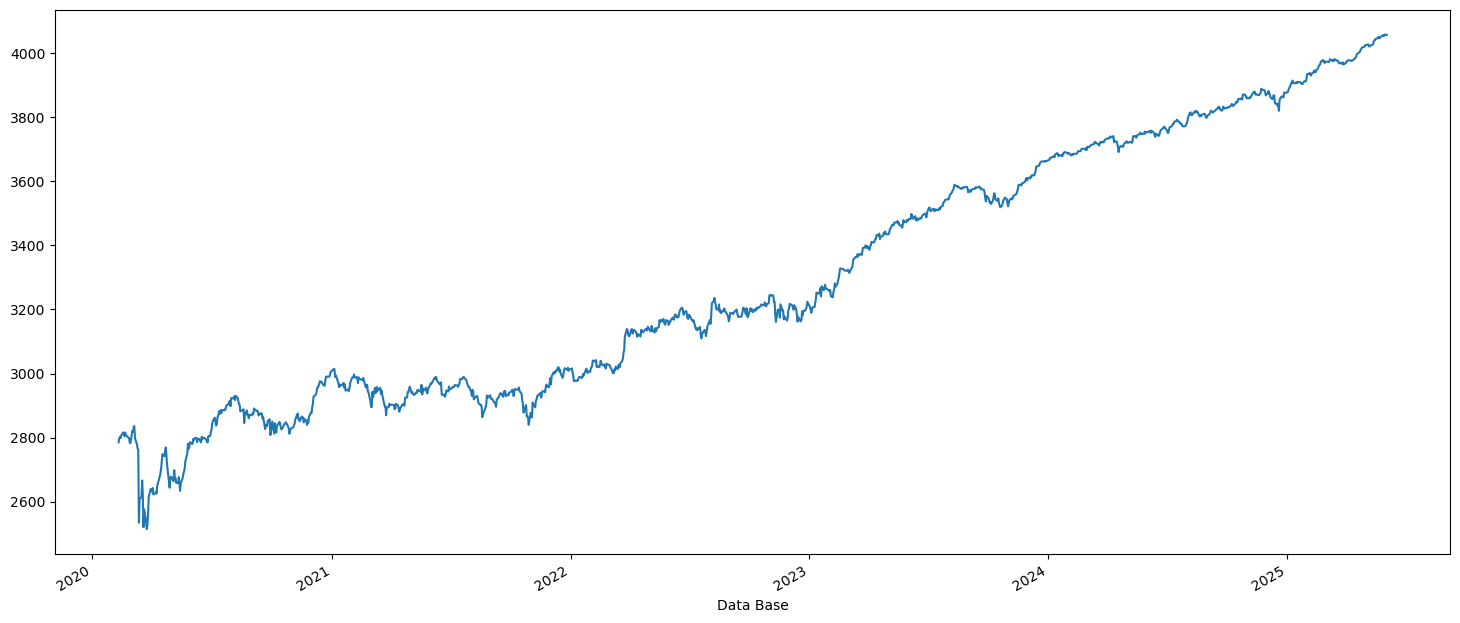

In [101]:
ipca2026['PU Compra Manha'].plot();

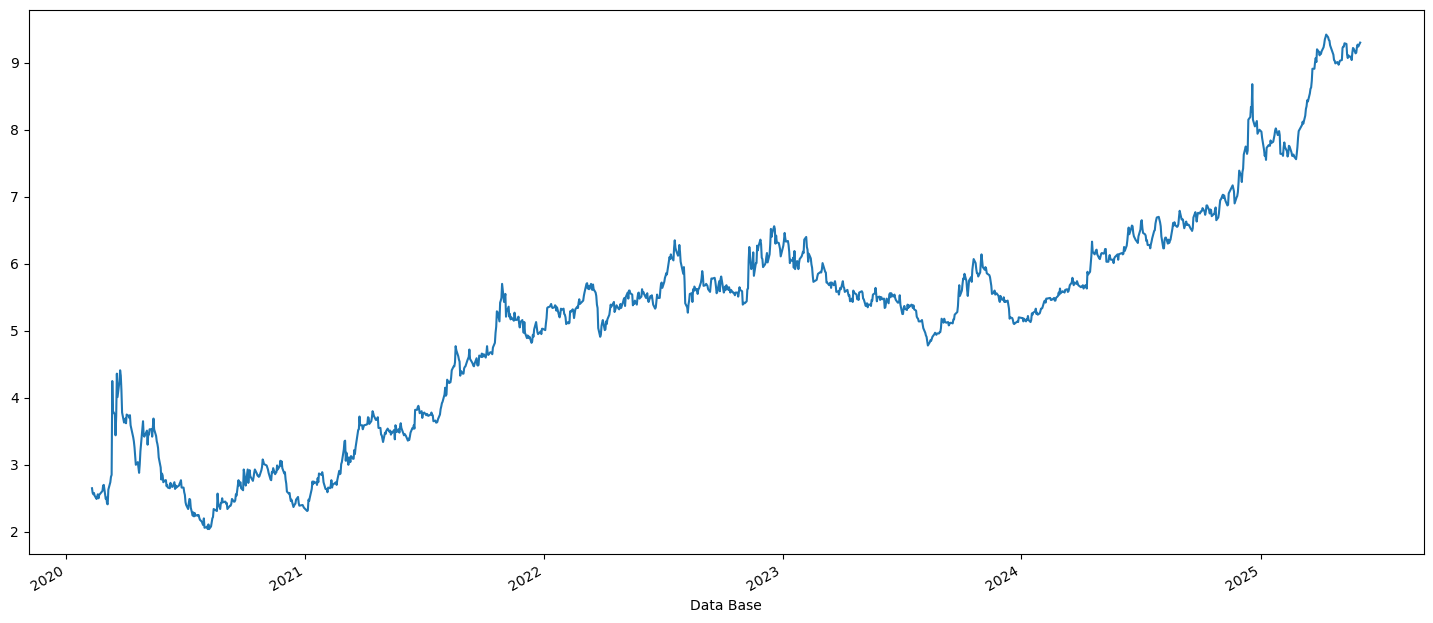

In [102]:
ipca2026['Taxa Compra Manha'].plot();

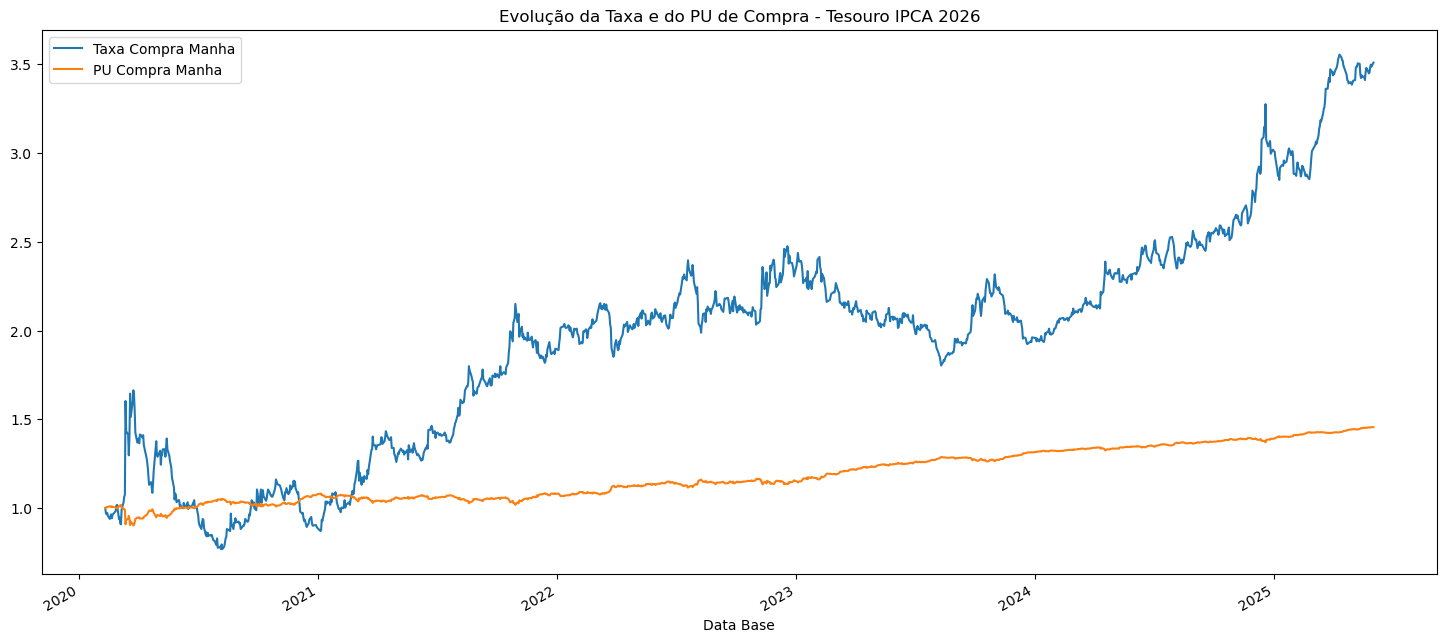

In [103]:
ax = (ipca2026['Taxa Compra Manha'] / ipca2026['Taxa Compra Manha'].iloc[0]).plot(label='Taxa Compra Manha')
(ipca2026['PU Compra Manha'] / ipca2026['PU Compra Manha'].iloc[0]).plot(ax=ax, label='PU Compra Manha')

# Adicionando legenda e título
plt.legend()
plt.title('Evolução da Taxa e do PU de Compra - Tesouro IPCA 2026')
plt.show()

### 2.7 Tesouro IPCA+ 2035

In [105]:
ipca2035 = titulos.loc[('Tesouro IPCA+', '2035-05-15')]
ipca2035

Taxa Compra Manha  Taxa Venda Manha  PU Compra Manha  \
Data Base                                                          
2010-03-08               6.23              6.33           415.52   
2010-03-09               6.25              6.35           413.78   
2010-03-10               6.25              6.35           413.99   
2010-03-11               6.25              6.35           414.20   
2010-03-12               6.27              6.37           412.69   
2010-03-15               6.28              6.38           411.87   
2010-03-16               6.27              6.37           413.00   
2010-03-17               6.26              6.36           414.13   
2010-03-18               6.26              6.36           414.28   
2010-03-19               6.22              6.32           418.46   
...                       ...               ...              ...   
2025-05-20               7.06              7.18          2291.53   
2025-05-21               7.18              7.30          2267.08   
2025-05-22               7.24              7.36          2255.43   
2025-05-23               7.17              7.29          2271.51   
2025-05-26               7.20              7.32          2266.12   
2025-05-27               7.06              7.18          2296.55   
2025-05-28               7.04              7.16          2301.38   
2025-05-29               7.12              7.24          2285.30   
2025-05-30               7.14              7.26          2282.45   
2025-06-02               7.16              7.28          2279.12   

            PU Venda Manha  PU Base Manha  
Data Base                                  
2010-03-08          405.82         405.61  
2010-03-09          404.12         403.91  
2010-03-10          404.33         404.12  
2010-03-11          404.54         404.33  
2010-03-12          403.07         402.82  
2010-03-15          402.27         402.12  
2010-03-16          403.37         403.22  
2010-03-17          404.47         404.32  
2010-03-18          404.62         404.47  
2010-03-19          408.71         408.46  
...                    ...            ...  
2025-05-20         2265.30        2265.30  
2025-05-21         2241.16        2241.16  
2025-05-22         2229.66        2229.66  
2025-05-23         2245.03        2245.03  
2025-05-26         2240.24        2240.24  
2025-05-27         2270.31        2270.31  
2025-05-28         2275.12        2275.12  
2025-05-29         2259.24        2259.24  
2025-05-30         2255.95        2255.95  
2025-06-02         2253.15        2253.15  

[3799 rows x 5 columns]

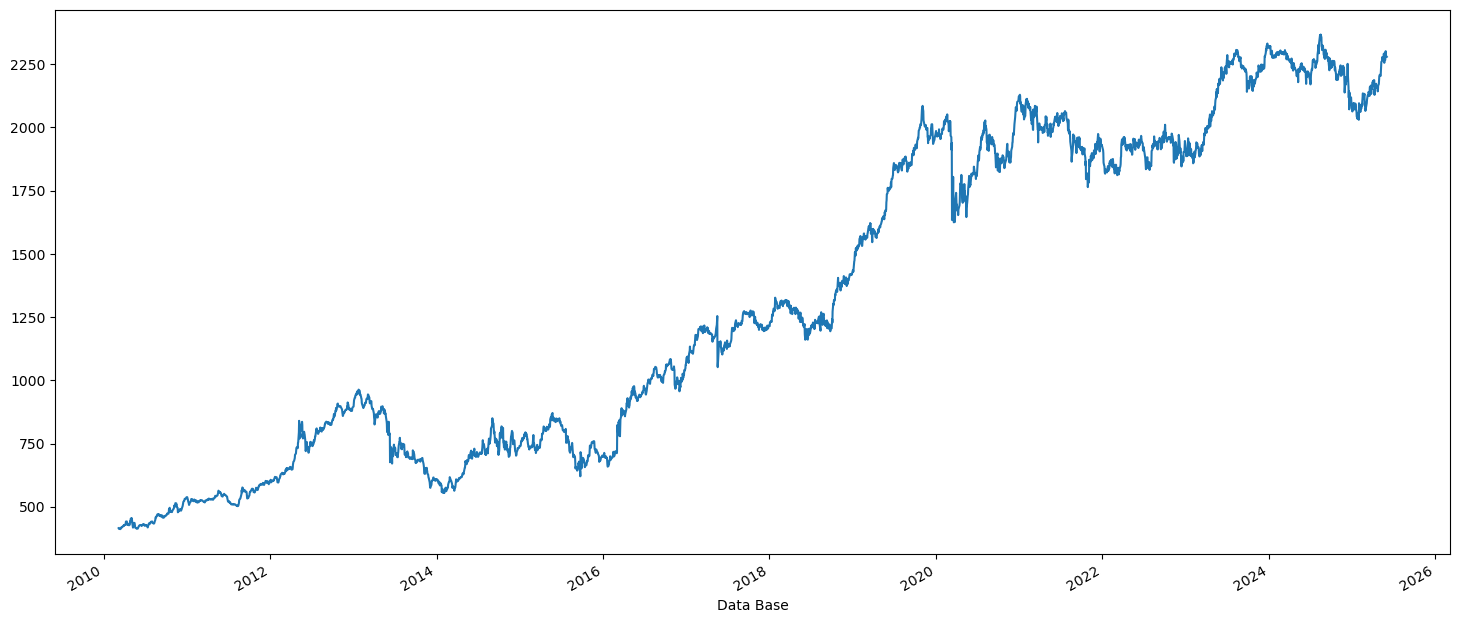

In [106]:
ipca2035['PU Compra Manha'].plot();

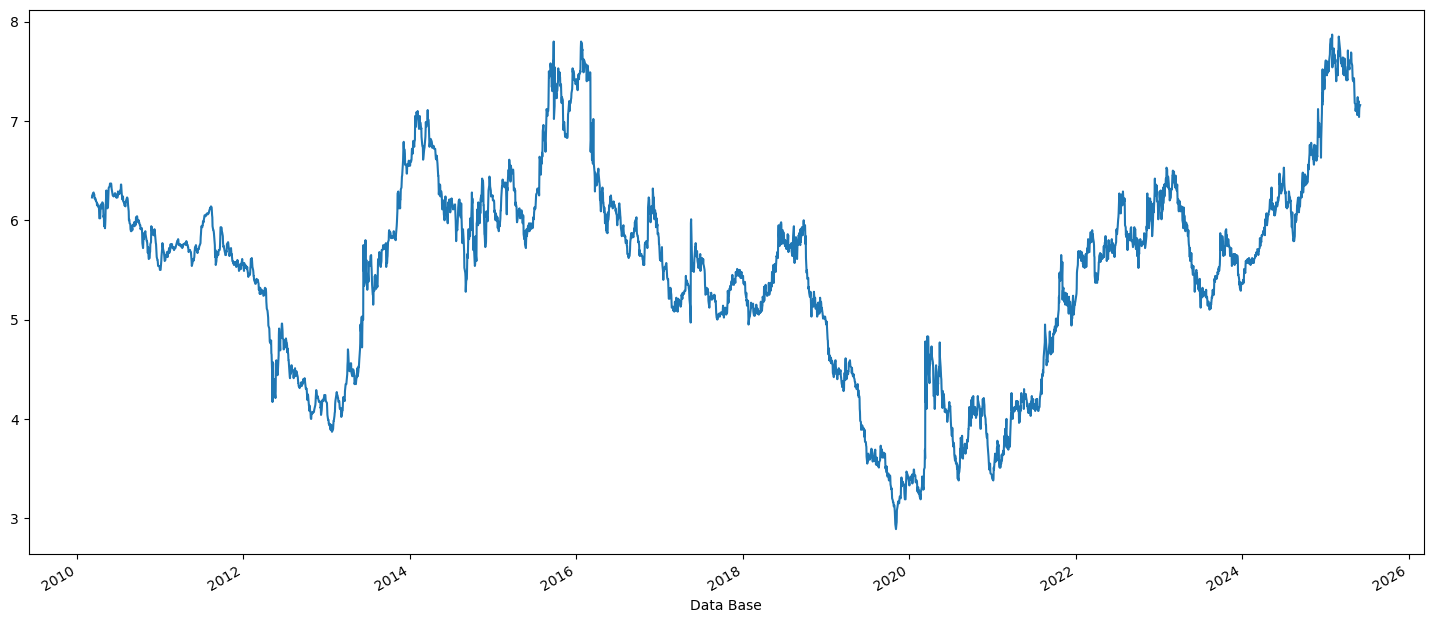

In [107]:
ipca2035['Taxa Compra Manha'].plot();

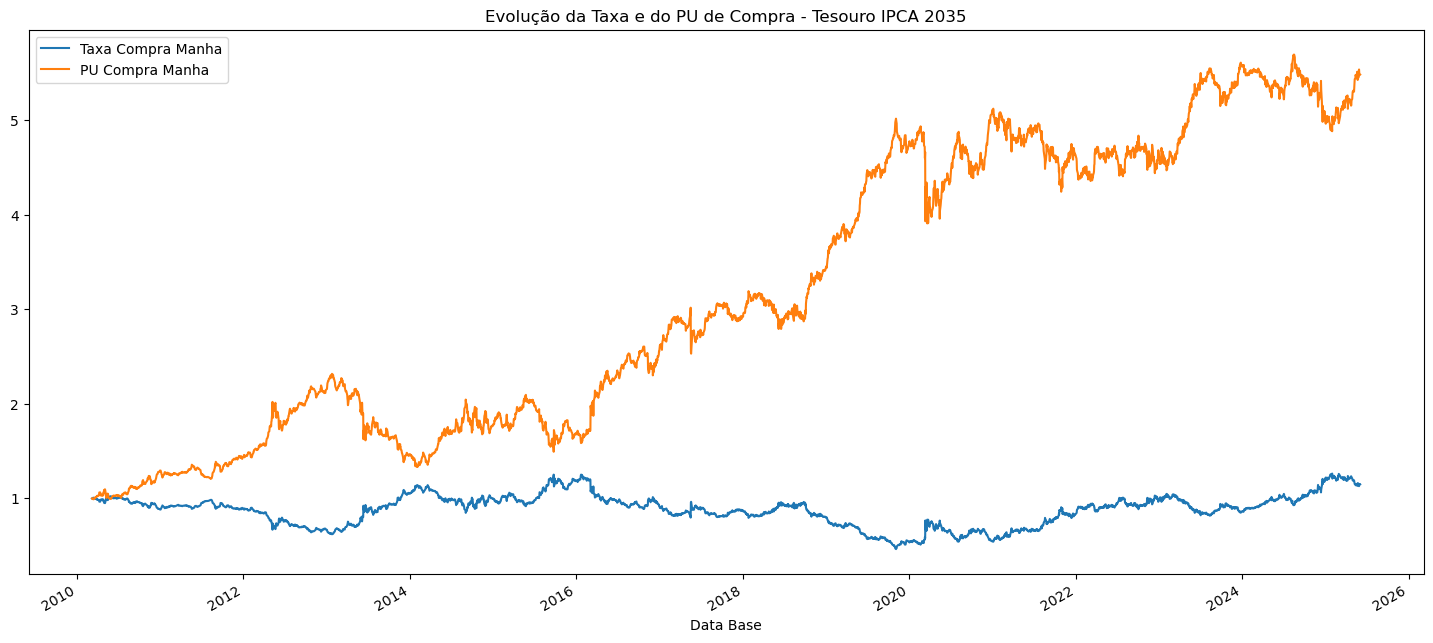

In [108]:
ax = (ipca2035['Taxa Compra Manha'] / ipca2035['Taxa Compra Manha'].iloc[0]).plot(label='Taxa Compra Manha')
(ipca2035['PU Compra Manha'] / ipca2035['PU Compra Manha'].iloc[0]).plot(ax=ax, label='PU Compra Manha')

# Adicionando legenda e título
plt.legend()
plt.title('Evolução da Taxa e do PU de Compra - Tesouro IPCA 2035')
plt.show()


### 2.8 Tesouro IPCA+ 2045

In [110]:
ipca2045 = titulos.loc[('Tesouro IPCA+', '2045-05-15')]
ipca2045

Taxa Compra Manha  Taxa Venda Manha  PU Compra Manha  \
Data Base                                                          
2017-02-08               5.34              5.46           685.78   
2017-02-09               5.27              5.39           698.96   
2017-02-10               5.21              5.33           710.67   
2017-02-13               5.21              5.33           710.90   
2017-02-14               5.22              5.34           709.23   
2017-02-15               5.22              5.34           709.49   
2017-02-16               5.25              5.37           704.09   
2017-02-17               5.32              5.44           691.53   
2017-02-20               5.27              5.39           701.09   
2017-02-21               5.25              5.37           705.11   
...                       ...               ...              ...   
2025-05-20               7.07              7.19          1160.62   
2025-05-21               7.15              7.27          1143.98   
2025-05-22               7.15              7.27          1144.42   
2025-05-23               7.05              7.17          1166.58   
2025-05-26               7.08              7.20          1160.56   
2025-05-27               6.97              7.09          1184.94   
2025-05-28               6.97              7.09          1185.24   
2025-05-29               7.04              7.16          1170.40   
2025-05-30               7.05              7.17          1168.93   
2025-06-02               7.05              7.17          1169.37   

            PU Venda Manha  PU Base Manha  
Data Base                                  
2017-02-08          664.14         663.92  
2017-02-09          676.90         676.67  
2017-02-10          688.23         687.84  
2017-02-13          688.46         688.23  
2017-02-14          686.85         686.62  
2017-02-15          687.10         686.85  
2017-02-16          681.88         681.62  
2017-02-17          669.73         669.25  
2017-02-20          678.98         678.73  
2017-02-21          682.87         682.62  
...                    ...            ...  
2025-05-20         1134.63        1134.63  
2025-05-21         1118.38        1118.38  
2025-05-22         1118.82        1118.82  
2025-05-23         1140.19        1140.19  
2025-05-26         1134.59        1134.59  
2025-05-27         1158.41        1158.41  
2025-05-28         1158.72        1158.72  
2025-05-29         1144.23        1144.23  
2025-05-30         1142.55        1142.55  
2025-06-02         1143.24        1143.24  

[2065 rows x 5 columns]

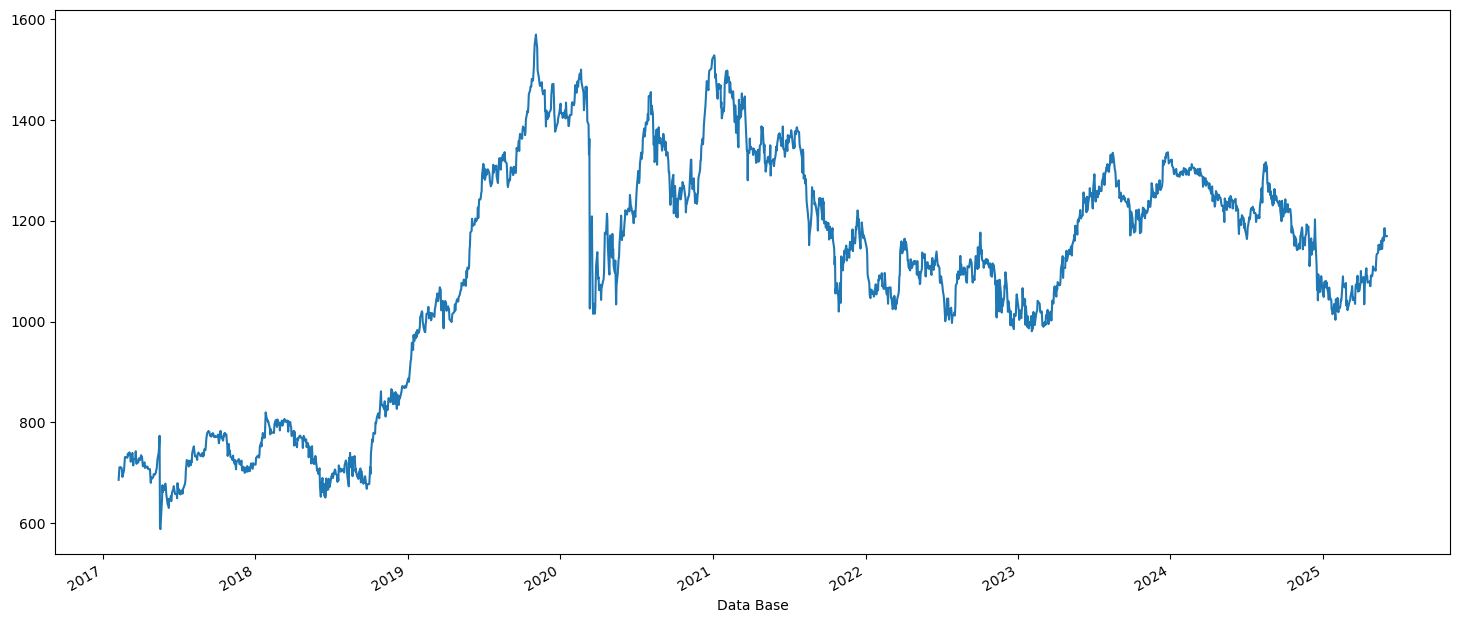

In [111]:
ipca2045['PU Compra Manha'].plot();

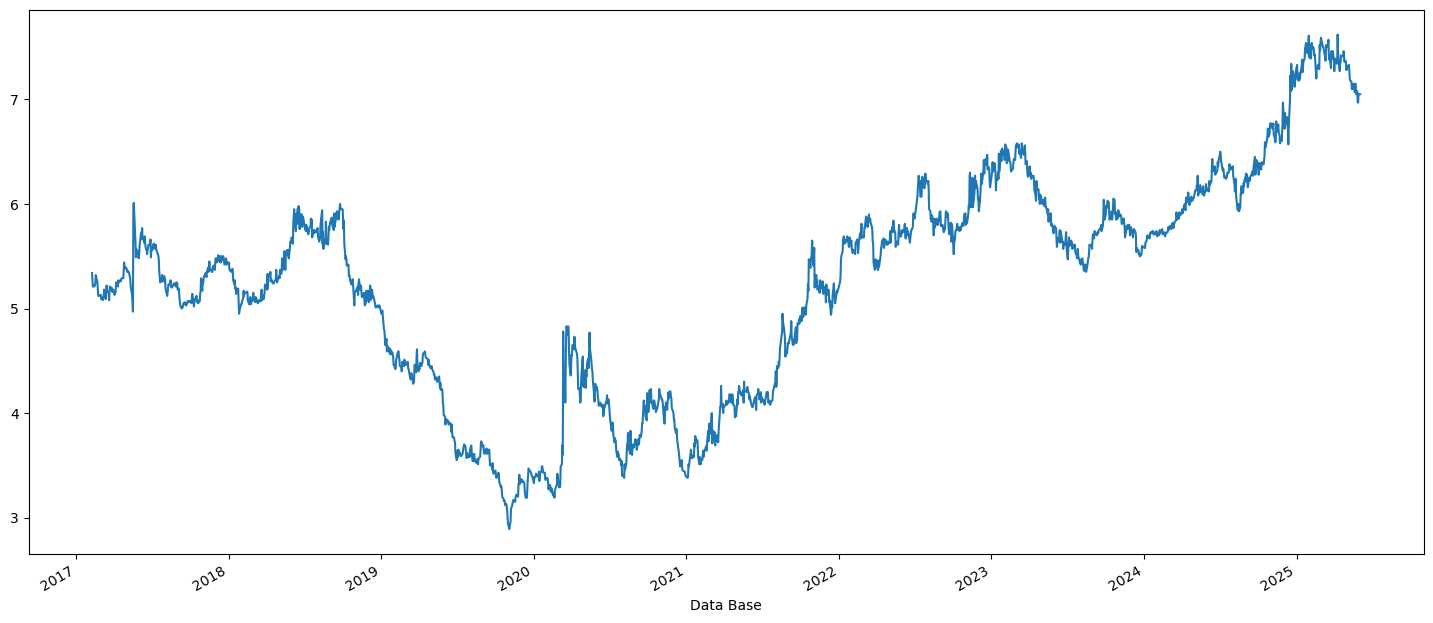

In [112]:
ipca2045['Taxa Compra Manha'].plot();

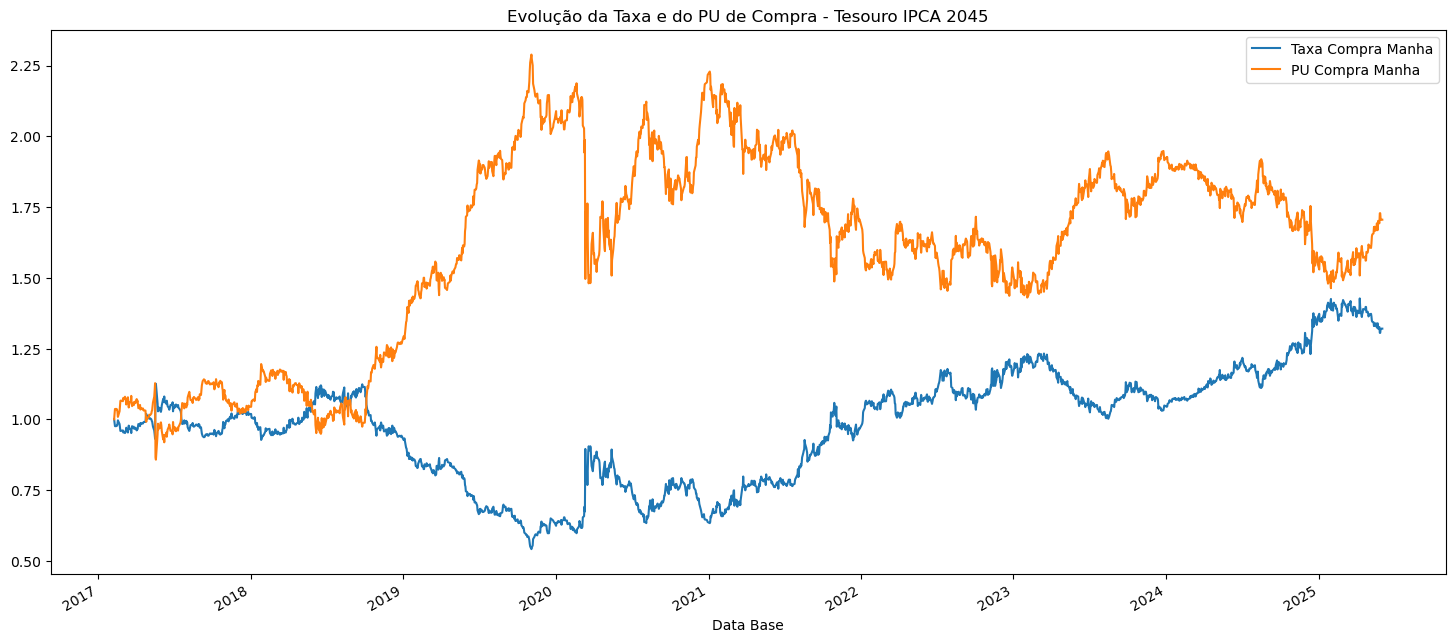

In [113]:
ax = (ipca2045['Taxa Compra Manha'] / ipca2045['Taxa Compra Manha'].iloc[0]).plot(label='Taxa Compra Manha')
(ipca2045['PU Compra Manha'] / ipca2045['PU Compra Manha'].iloc[0]).plot(ax=ax, label='PU Compra Manha')

# Adicionando legenda e título
plt.legend()
plt.title('Evolução da Taxa e do PU de Compra - Tesouro IPCA 2045')
plt.show()


### 2.9 Tesouro IPCA+ 2055 com Juros Semestrais

In [115]:
ipca2055 = titulos.loc[('Tesouro IPCA+ com Juros Semestrais', '2055-05-15')]
ipca2055

Taxa Compra Manha  Taxa Venda Manha  PU Compra Manha  \
Data Base                                                          
2020-02-10               3.42              3.54          5063.37   
2020-02-11               3.36              3.48          5119.00   
2020-02-12               3.36              3.48          5120.02   
2020-02-13               3.40              3.52          5084.54   
2020-02-14               3.37              3.49          5113.38   
2020-02-17               3.34              3.46          5141.86   
2020-02-18               3.37              3.49          5115.22   
2020-02-19               3.37              3.49          5116.14   
2020-02-20               3.34              3.46          5144.62   
2020-02-21               3.43              3.55          5064.69   
...                       ...               ...              ...   
2025-05-20               7.00              7.12          3982.49   
2025-05-21               7.09              7.21          3939.66   
2025-05-22               7.12              7.24          3926.60   
2025-05-23               7.05              7.17          3963.32   
2025-05-26               7.08              7.20          3950.12   
2025-05-27               6.96              7.08          4011.16   
2025-05-28               6.97              7.09          4007.15   
2025-05-29               7.04              7.16          3973.85   
2025-05-30               7.05              7.17          3971.29   
2025-06-02               7.06              7.18          3967.88   

            PU Venda Manha  PU Base Manha  
Data Base                                  
2020-02-10         4956.73        4955.71  
2020-02-11         5010.64        5009.63  
2020-02-12         5011.66        5010.64  
2020-02-13         4977.32        4976.30  
2020-02-14         5005.31        5003.81  
2020-02-17         5032.93        5032.01  
2020-02-18         5007.16        5006.23  
2020-02-19         5008.08        5007.16  
2020-02-20         5035.70        5034.77  
2020-02-21         4958.31        4956.35  
...                    ...            ...  
2025-05-20         3921.98        3921.98  
2025-05-21         3880.22        3880.22  
2025-05-22         3867.50        3867.50  
2025-05-23         3902.44        3902.44  
2025-05-26         3890.53        3890.53  
2025-05-27         3950.12        3950.12  
2025-05-28         3946.27        3946.27  
2025-05-29         3913.81        3913.81  
2025-05-30         3910.50        3910.50  
2025-06-02         3908.05        3908.05  

[1321 rows x 5 columns]

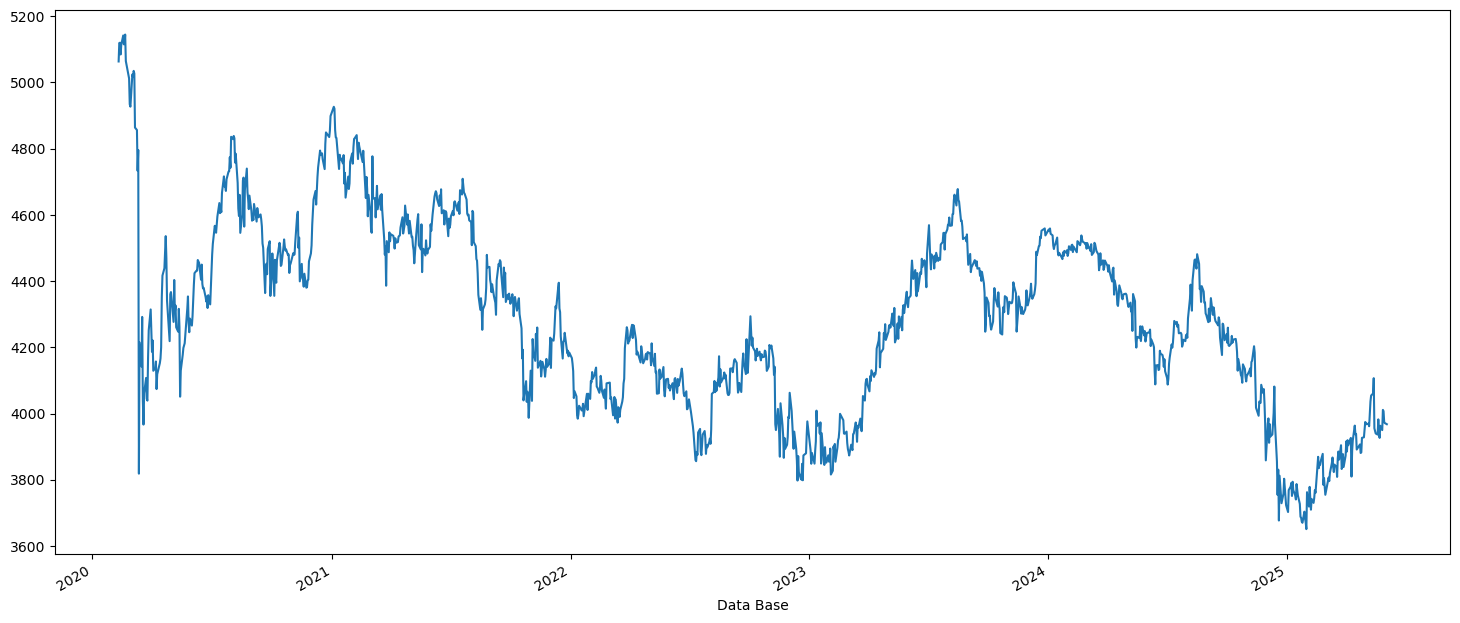

In [116]:
ipca2055['PU Compra Manha'].plot();

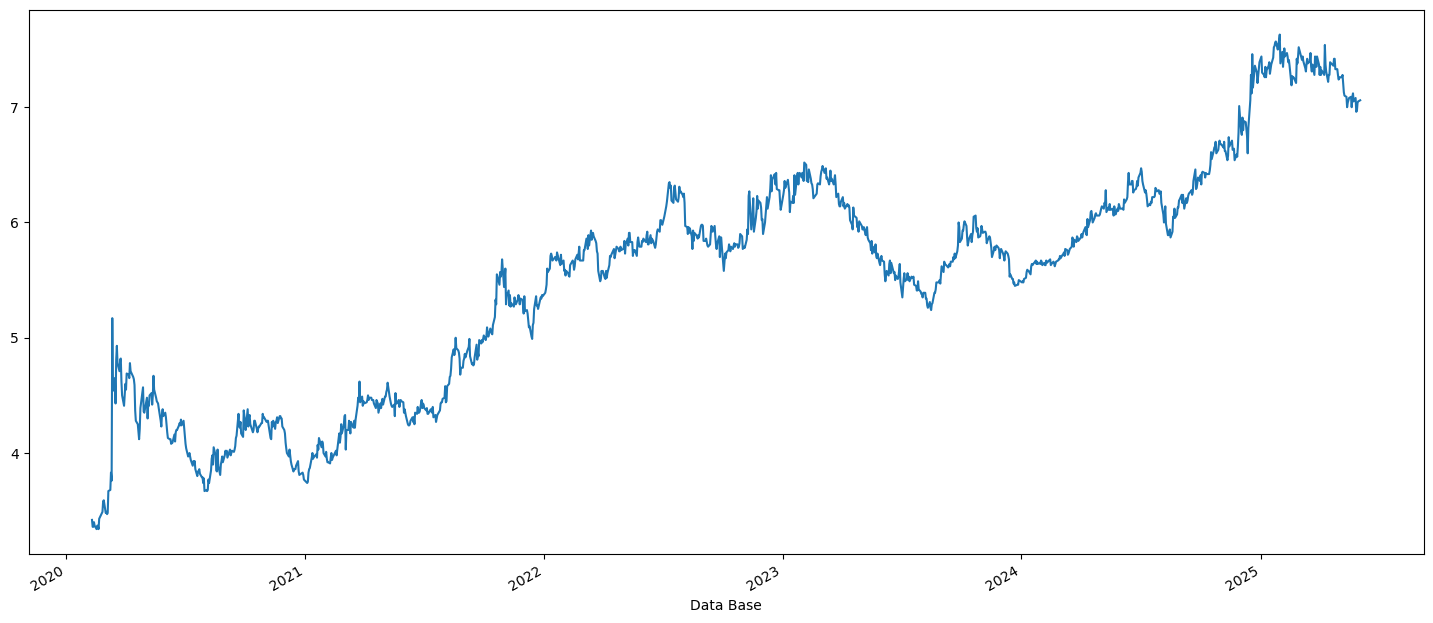

In [117]:
ipca2055['Taxa Compra Manha'].plot();

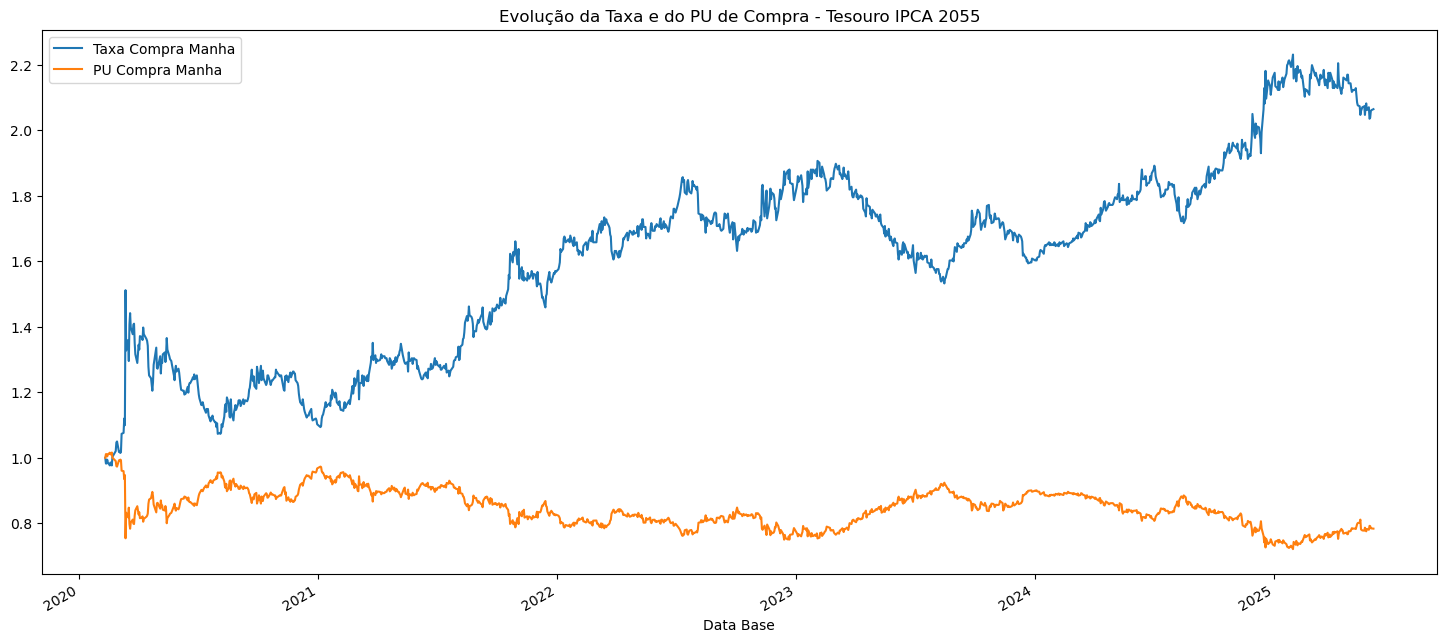

In [118]:
ax = (ipca2055['Taxa Compra Manha'] / ipca2055['Taxa Compra Manha'].iloc[0]).plot(label='Taxa Compra Manha')
(ipca2055['PU Compra Manha'] / ipca2055['PU Compra Manha'].iloc[0]).plot(ax=ax, label='PU Compra Manha')

# Adicionando legenda e título
plt.legend()
plt.title('Evolução da Taxa e do PU de Compra - Tesouro IPCA 2055')
plt.show()


## 3. Vendas Tesouro Direto

Este conjunto de dados traz o volume de vendas diário do programa Tesouro Direto.

### 3.1 Buscando Dados

In [121]:
vendas = busca_vendas_tesouro()

In [122]:
vendas.sort_index(inplace=True)
vendas

PU  Quantidade  \
Tipo Titulo    Vencimento do Titulo Data Venda                             
Tesouro Educa+ 2030-12-15           2023-08-02   3248.250572      331.84   
                                    2023-08-03   3250.646532      183.44   
                                    2023-08-04   3260.006540      157.49   
                                    2023-08-07   3260.737100      360.67   
                                    2023-08-08   3263.770709      227.79   
                                    2023-08-09   3269.745017      194.17   
                                    2023-08-10   3274.217156      146.53   
                                    2023-08-11   3280.013108      160.97   
                                    2023-08-14   3286.898059      187.56   
                                    2023-08-15   3280.731141       96.11   
...                                                      ...         ...   
Tesouro Selic  2031-03-01           2025-05-19  16463.771312     5278.33   
                                    2025-05-20  16473.640411     6043.99   
                                    2025-05-21  16482.842089     5785.05   
                                    2025-05-22  16492.432358     4840.43   
                                    2025-05-23  16501.732477     4329.76   
                                    2025-05-26  16510.951219     5180.36   
                                    2025-05-27  16520.542194     5172.55   
                                    2025-05-28  16530.065255     4454.98   
                                    2025-05-29  16539.302635     4005.21   
                                    2025-05-30  16548.442301     3734.13   

                                                      Valor  
Tipo Titulo    Vencimento do Titulo Data Venda               
Tesouro Educa+ 2030-12-15           2023-08-02   1077899.46  
                                    2023-08-03    596298.59  
                                    2023-08-04    513418.42  
                                    2023-08-07   1176050.04  
                                    2023-08-08    743454.32  
                                    2023-08-09    634886.38  
                                    2023-08-10    479771.03  
                                    2023-08-11    527983.70  
                                    2023-08-14    616490.59  
                                    2023-08-15    315311.06  
...                                                     ...  
Tesouro Selic  2031-03-01           2025-05-19  86901218.02  
                                    2025-05-20  99566517.90  
                                    2025-05-21  95354065.62  
                                    2025-05-22  79830464.35  
                                    2025-05-23  71448541.20  
                                    2025-05-26  85532671.25  
                                    2025-05-27  85453330.52  
                                    2025-05-28  73641110.10  
                                    2025-05-29  66243380.30  
                                    2025-05-30  61794034.84  

[88658 rows x 3 columns]

### 3.2 Gráficos

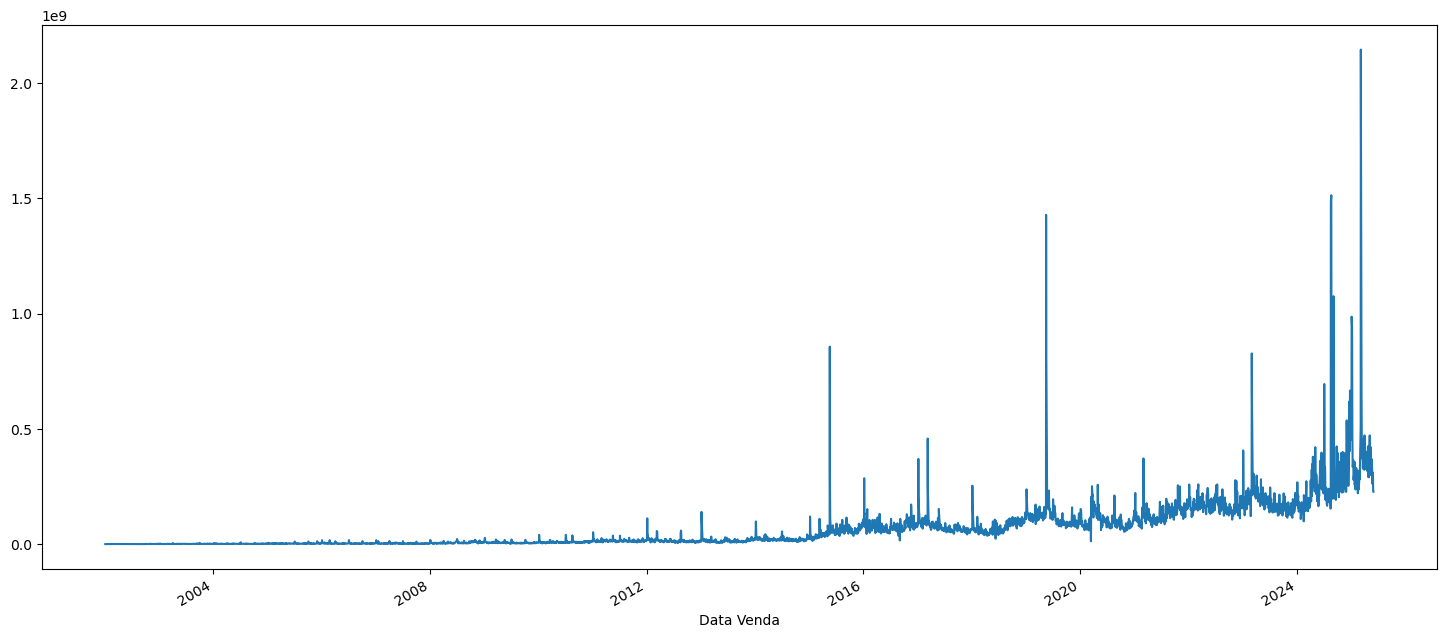

In [124]:
vendas['Valor'].groupby('Data Venda').sum().plot();

## 4. Recompras Tesouro Direto

Esse conjunto da dados contém listagem dos títulos que foram entregues pelo investidor antes do vencimento. Estão listados por dia e por título. Frequência: Atualização diária com dados até dois dias antes à data do arquivo.

### 4.1 Buscando Dados

In [127]:
recompras = busca_recompras_tesouro()

In [128]:
recompras.sort_index(inplace=True)
recompras

Quantidade        Valor
Tipo Titulo    Vencimento do Titulo Data Resgate                         
Tesouro Educa+ 2030-12-15           2023-10-02          2.22      7098.90
                                    2023-10-03          2.11      6732.51
                                    2023-10-04          4.65     14775.77
                                    2023-10-05          0.46      1462.84
                                    2023-10-06          0.20       633.19
                                    2023-10-09          2.52      8038.12
                                    2023-10-10          2.81      9004.14
                                    2023-10-11          3.07      9861.50
                                    2023-10-13         50.09    160484.82
                                    2023-10-16          2.95      9433.78
...                                                      ...          ...
Tesouro Selic  2031-03-01           2025-05-19       1294.89  21307397.31
                                    2025-05-20       1063.87  17515854.12
                                    2025-05-21        878.65  14474647.31
                                    2025-05-22        902.35  14873557.21
                                    2025-05-23        976.28  16101159.75
                                    2025-05-26       1328.53  21923268.03
                                    2025-05-27       1134.47  18731679.00
                                    2025-05-28        995.04  16438760.19
                                    2025-05-29       1116.51  18455762.81
                                    2025-05-30        830.22  13730973.66

[82691 rows x 2 columns]

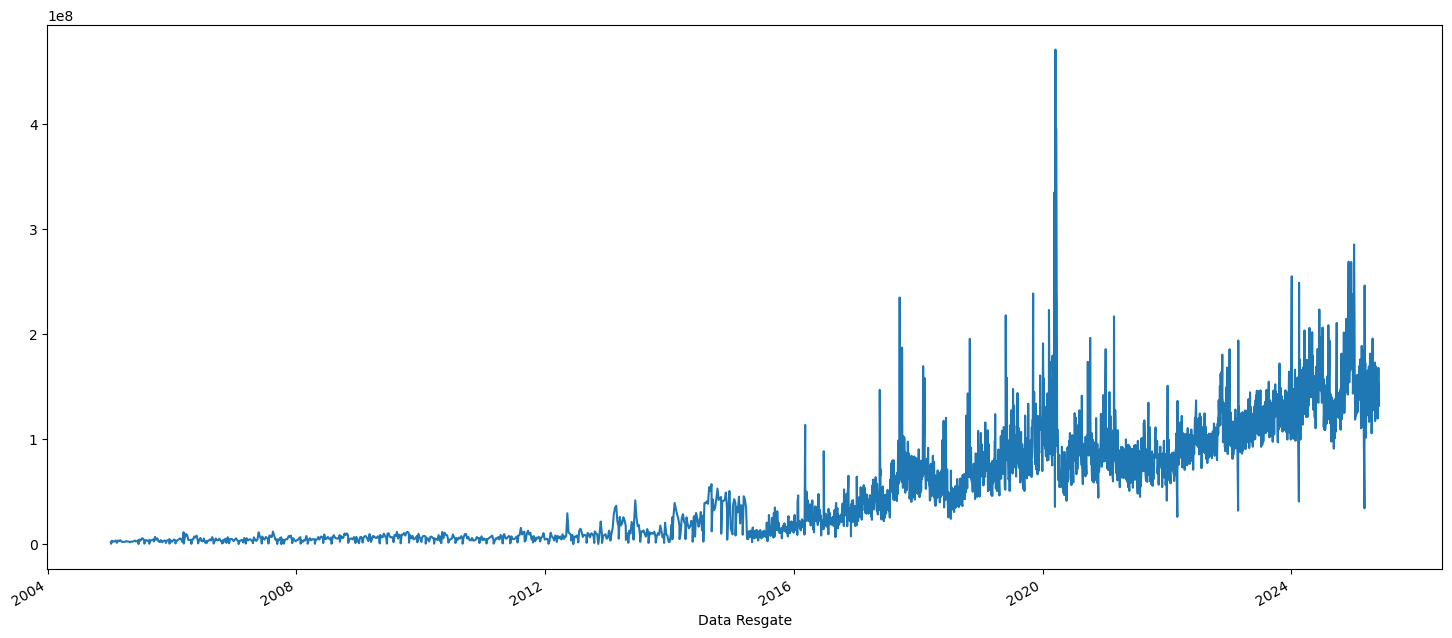

In [129]:
recompras['Valor'].groupby('Data Resgate').sum().plot();

### 4.2 Recompras diárias Tesouro Selic 2031

In [131]:
recompras_selic = recompras.loc[('Tesouro Selic', '2031-03-01')]

C:\Users\carlo\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


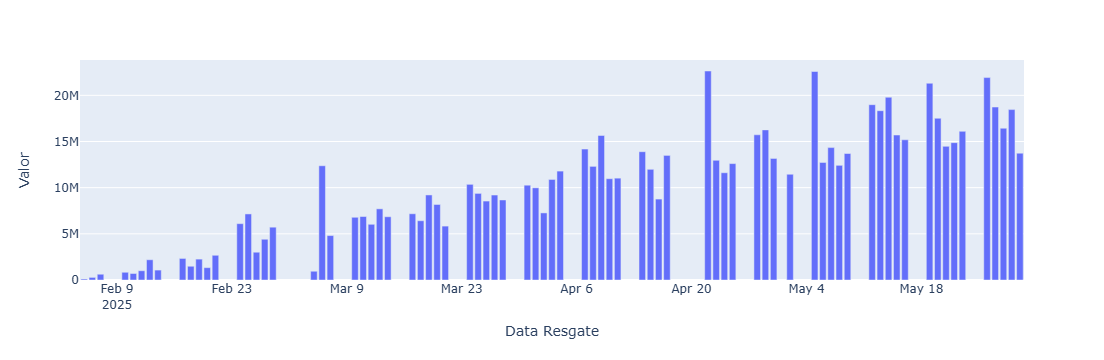

In [132]:
fig = px.bar(data_frame=recompras_selic,  x=recompras_selic.index, y='Valor', labels={'x':'Data'})
fig.show()

In [133]:
recompras_selic_semanal = recompras_selic.resample('W').sum()

C:\Users\carlo\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



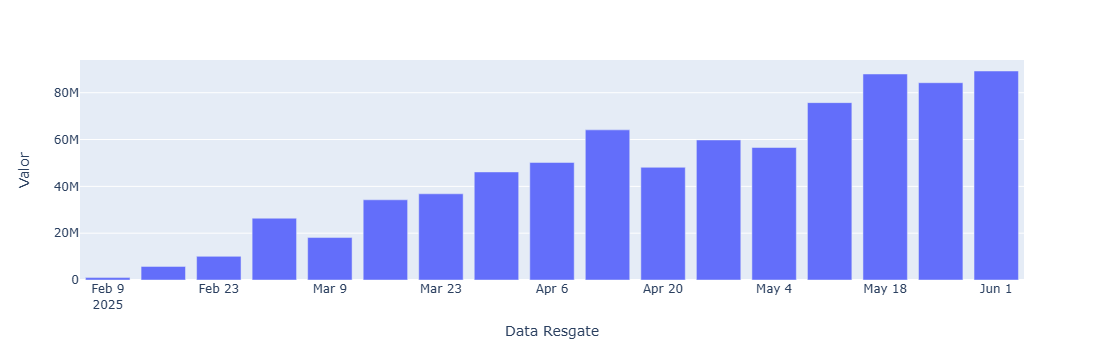

In [134]:
fig = px.bar(data_frame=recompras_selic_semanal,  x=recompras_selic_semanal.index, y='Valor' )
fig.show()

### 4.3 Resgastes Tesouro Selic vs Índice Bovespa

In [136]:
ibov = yf.download('^BVSP')['Close'].resample('W').last().pct_change()[1:]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [137]:
selic_ibov = pd.concat([recompras_selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']
selic_ibov

Recompra(%)   IBOV(%)
2025-02-23     0.738227 -0.008509
2025-03-02     1.613359 -0.034052
2025-03-09    -0.313148  0.018209
2025-03-16     0.889389  0.031367
2025-03-23     0.074769  0.026272
2025-03-30     0.253773 -0.003347
2025-04-06     0.087520 -0.035223
2025-04-13     0.277613  0.003348
2025-04-20    -0.249377  0.015413
2025-04-27     0.242594  0.039252
2025-05-04    -0.053852  0.002932
2025-05-11     0.338603  0.010197
2025-05-18     0.161508  0.019595
2025-05-25    -0.042388 -0.009793
2025-06-01     0.059424 -0.005783

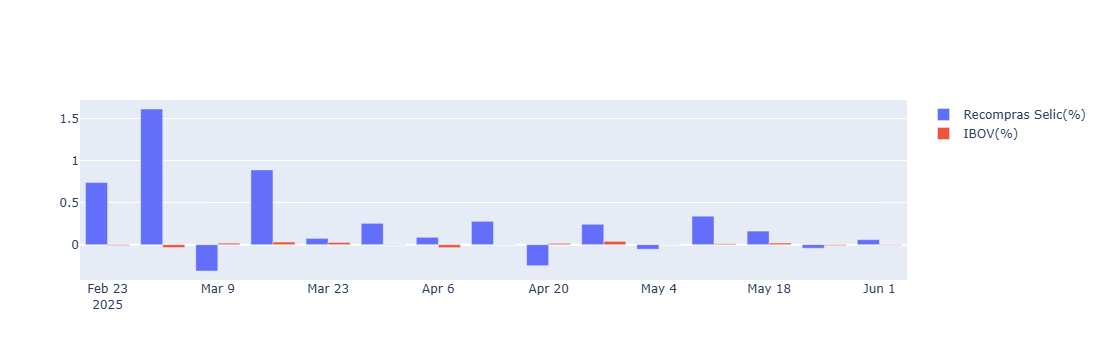

In [138]:
fig = go.Figure(data=[
    go.Bar(name='Recompras Selic(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)']),
    go.Bar(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)']),
])
fig.update_layout(barmode='group')
fig.show()

In [139]:
selic_ibov.corr()

Recompra(%)   IBOV(%)
Recompra(%)     1.000000 -0.315432
IBOV(%)        -0.315432  1.000000